In [40]:
import seaborn as sns
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import math

In [41]:
sns.set_style("whitegrid")
spotify = pd.read_csv("Spotify_Youtube.csv", usecols=[12, 13, 14])
# spotify.drop('Artist', axis = 1)
spotify.head()

,Tempo,Duration_ms,Stream
0,138.559,222640,1040234854
1,92.761,200173,310083733
2,108.014,215150,63063467
3,120.423,233867,434663559
4,167.953,340920,617259738


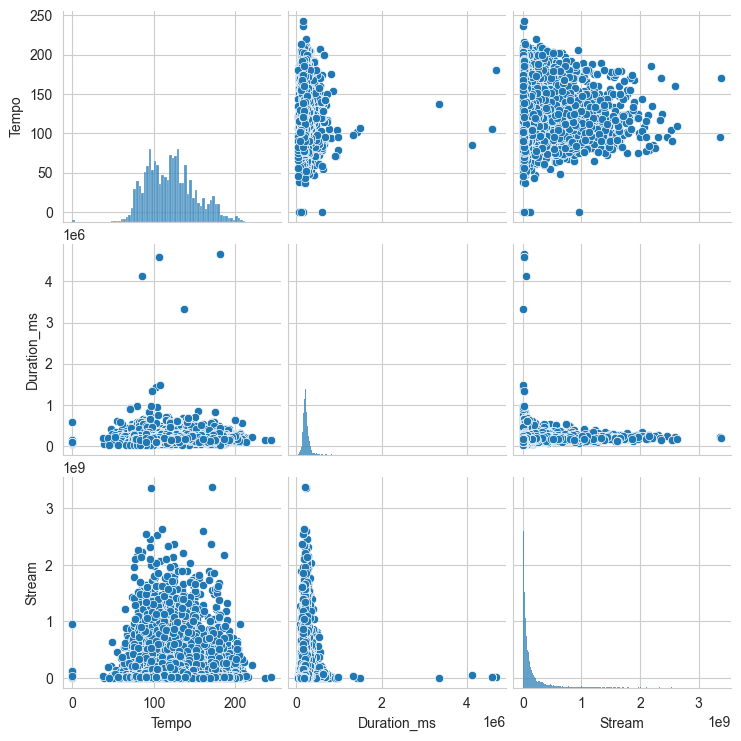

In [42]:
sns.pairplot(spotify)

# First Data Analysis

Streams seems like it is following a logoarithmic pattern. Should apply Logarithmic transform for better analysis.

Duration also seems skewed, but I think we can use a Poisson Dist, or check for outliers on Duration_ms.

In [43]:
spotify['Stream2'] = np.log(spotify['Stream'])
spotify.head()

,Tempo,Duration_ms,Stream,Stream2
0,138.559,222640,1040234854,20.762712
1,92.761,200173,310083733,19.552353
2,108.014,215150,63063467,17.959652
3,120.423,233867,434663559,19.890083
4,167.953,340920,617259738,20.240800


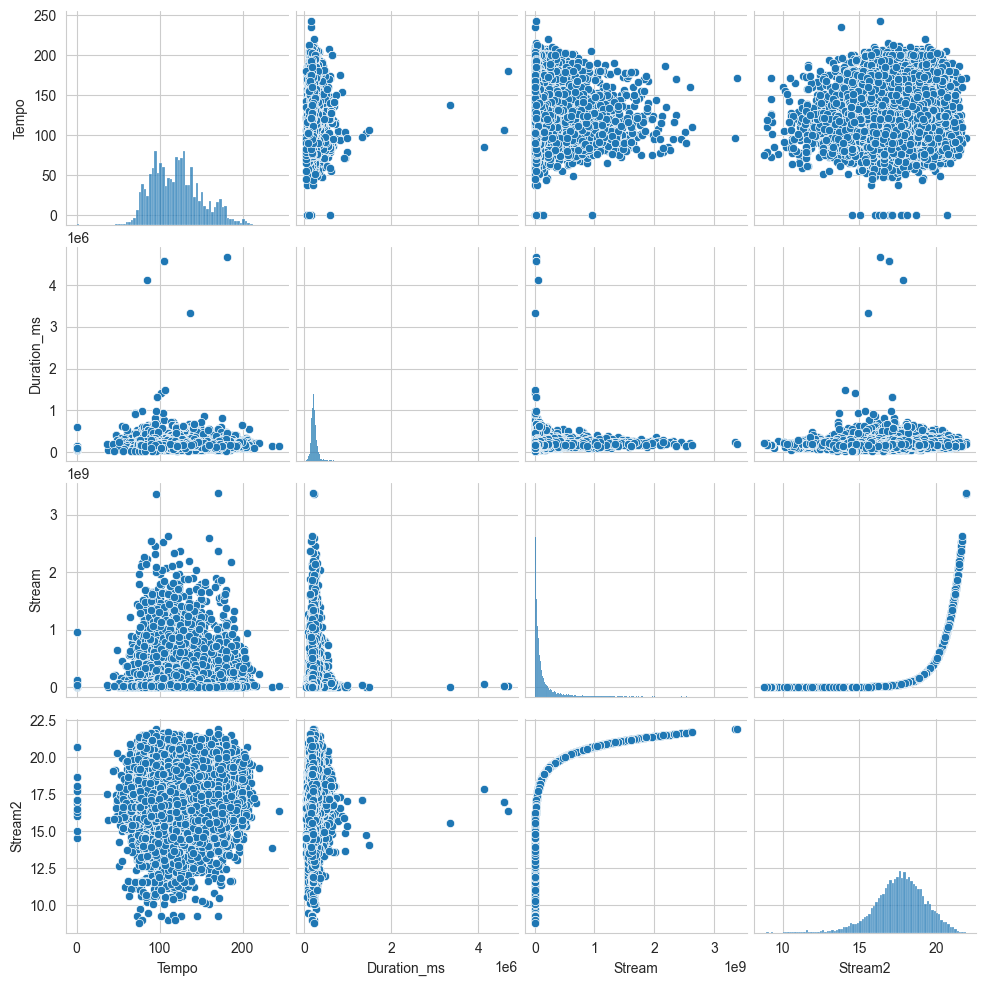

In [44]:
sns.pairplot(spotify)


# Second Exploratory Analysis
Pairplots follow a more normally/uniform distributed scatterplot in relation to the new dummy stream2. When looking at stream vs stream2, the logarithmic pattern is far more noticeable. The dummy variable Stream2 seems to follow an almost normal distribution, and may be used under normal distribution assumptions in analysis. Duration_ms should still follow a poisson assumption for analysis. Further exploration is required. 

{'whiskers': [<matplotlib.lines.Line2D at 0x12bad9710>,
 'caps': [<matplotlib.lines.Line2D at 0x12bada850>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bad8f90>],
 'medians': [<matplotlib.lines.Line2D at 0x12badb990>],
 'fliers': [<matplotlib.lines.Line2D at 0x12bae8190>],
 'means': []}

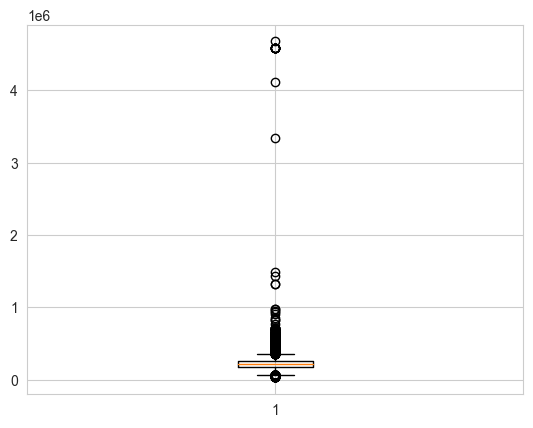

In [45]:
plt.boxplot(spotify['Duration_ms'])

There are many outliers present, for the Duration_ms variable however, this seems to be moreso under a poisson distribution marker than complete outliers. Further analysis needed. maybe taking square root of the data?


In [46]:
spotify['Duration_ms2'] = np.sqrt(spotify['Duration_ms'])
spotify.head()

,Tempo,Duration_ms,Stream,Stream2,Duration_ms2
0,138.559,222640,1040234854,20.762712,471.847433
1,92.761,200173,310083733,19.552353,447.406974
2,108.014,215150,63063467,17.959652,463.842646
3,120.423,233867,434663559,19.890083,483.597974
4,167.953,340920,617259738,20.240800,583.883550


{'whiskers': [<matplotlib.lines.Line2D at 0x12bb2f090>,
 'caps': [<matplotlib.lines.Line2D at 0x12bb3c2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12bb2e850>],
 'medians': [<matplotlib.lines.Line2D at 0x12bb3d290>],
 'fliers': [<matplotlib.lines.Line2D at 0x12ac4fa10>],
 'means': []}

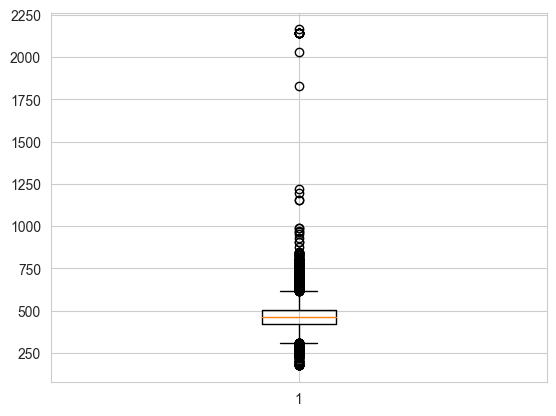

In [47]:
plt.boxplot(spotify['Duration_ms2'])

not too assuring, but we have something...

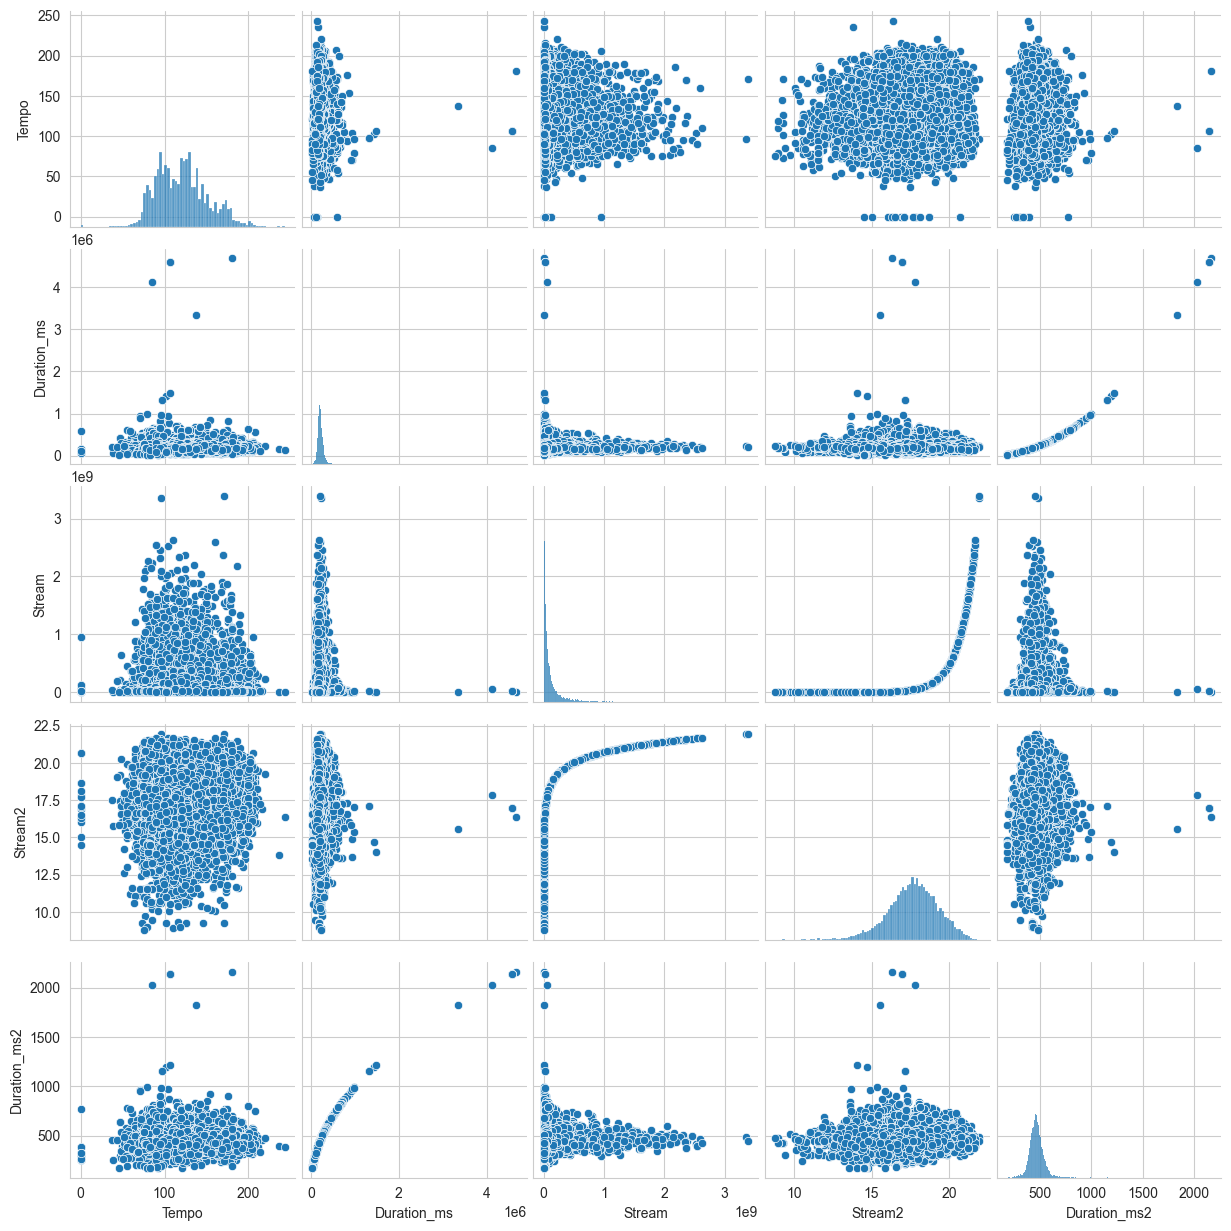

In [48]:
sns.pairplot(spotify)

Nevermind that didnt work.... need to look for outliers.